In [1]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
# Display the first few rows of the features
print(X.head())

# Display the first few rows of the target
print(y.head())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0    

### Import the libraries for the project

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
#concate the features to the target
df = pd.concat([X, y], axis=1)
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [11]:
#check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

<Axes: >

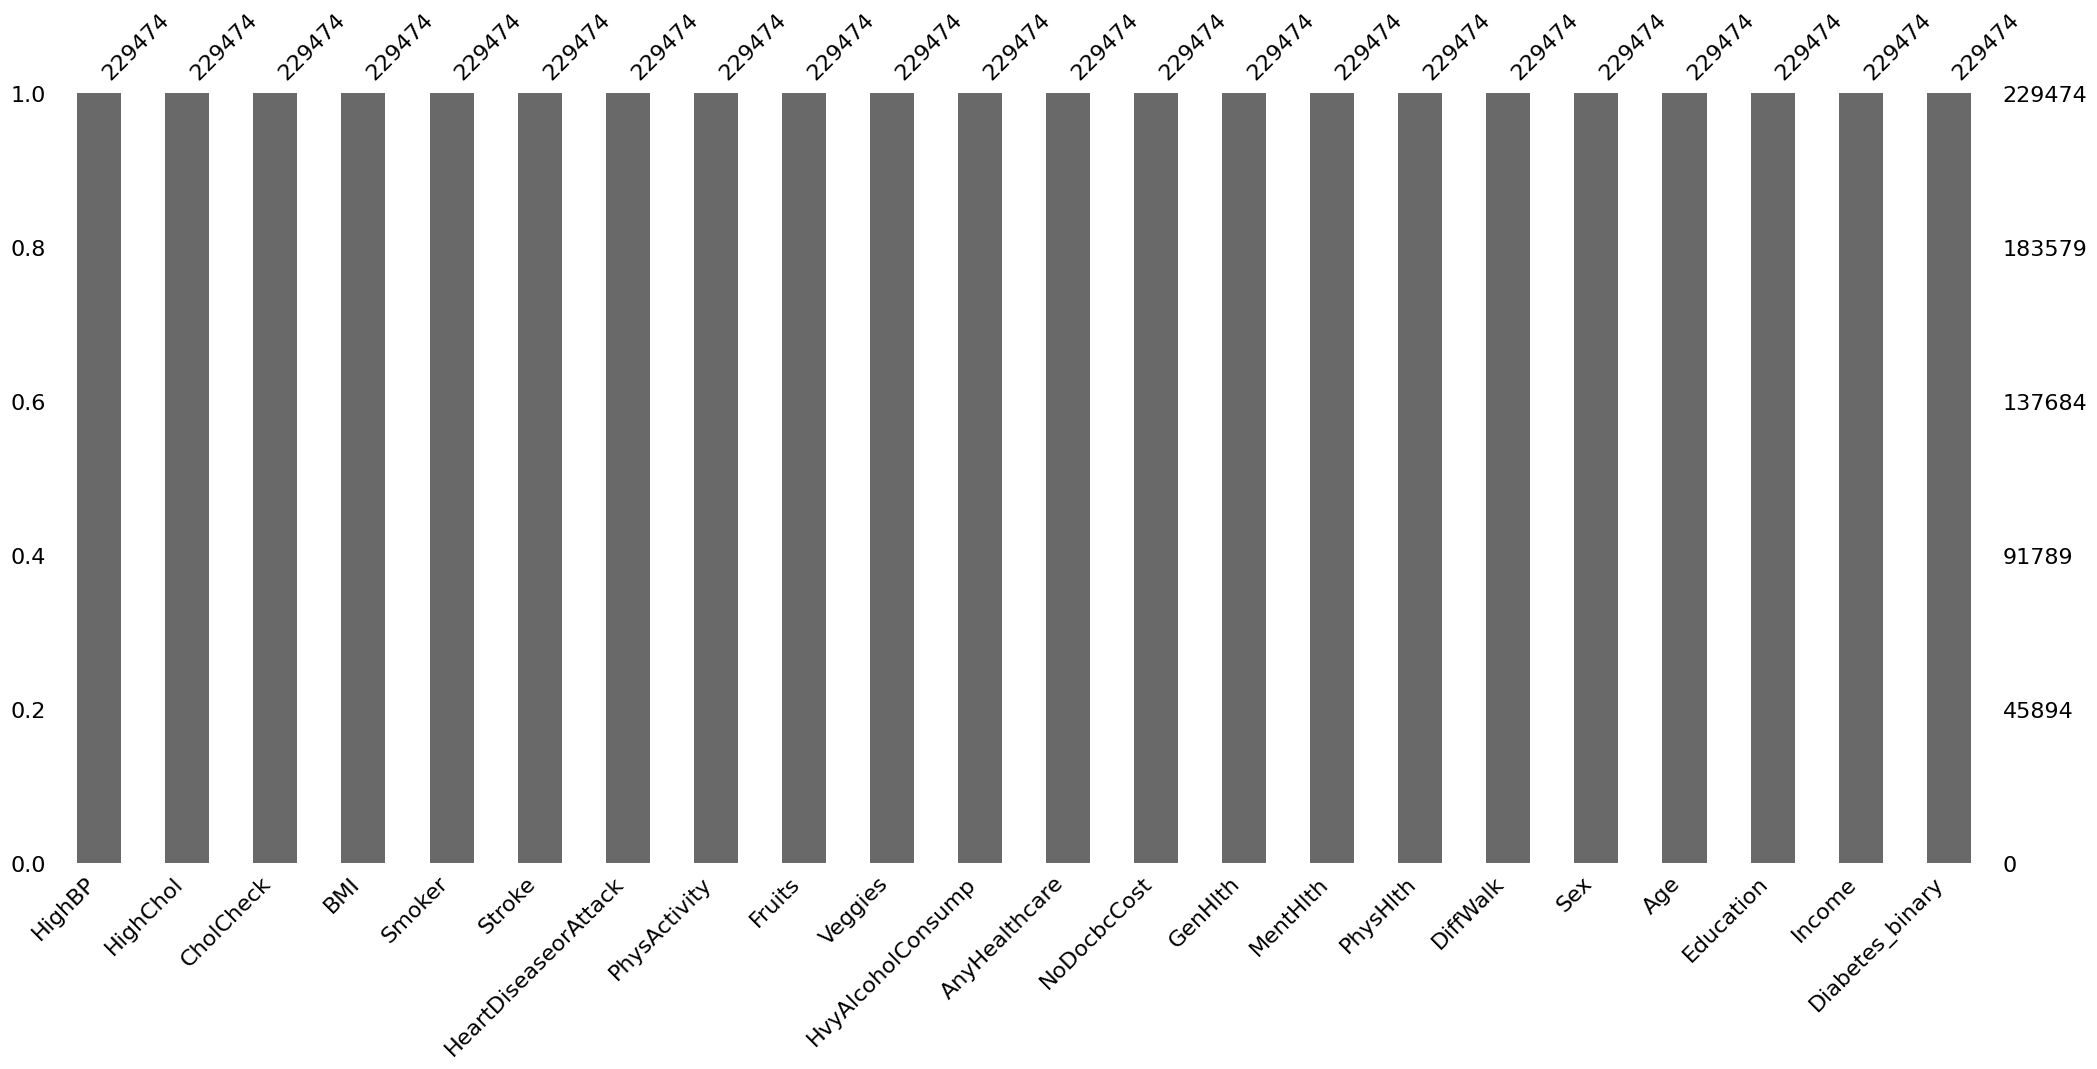

In [21]:
msno.bar(df)

In [13]:
# check for missing values
missing_values = df.isnull().sum()
missing_values.head()

HighBP       0
HighChol     0
CholCheck    0
BMI          0
Smoker       0
dtype: int64

In [16]:
# check for duplicated values
duplicated_values = df.duplicated().value_counts()
duplicated_values

False    229474
True      24206
Name: count, dtype: int64

In [18]:
#drop duplicated values
duplicated_values = df.drop_duplicates(inplace=True)


In [19]:
# check for duplicated values occurrence
df.duplicated().value_counts()

False    229474
Name: count, dtype: int64

In [20]:
# describe the data_sets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0
Veggies,229474.0,0.794587,0.404004,0.0,1.0,1.0,1.0,1.0


In [24]:
# Correrelate the features to the target
df.corr()['Diabetes_binary'].sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64

### Machine_Learning

***prepare the data for training***

In [28]:
#prepare the data for Training
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Logistic Regression***

In [40]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f'classification_report:\n{classification_report(y_test, y_pred_log_reg)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}')

Logistic Regression Accuracy: 0.85
classification_report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     38813
           1       0.54      0.15      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895

confusion_matrix:
[[37915   898]
 [ 6030  1052]]


***Decision Tree Classifier***

In [41]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f'classification_report:\n{classification_report(y_test, y_pred_dt)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred_dt)}')

Logistic Regression Accuracy: 0.77
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     38813
           1       0.29      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895

confusion_matrix:
[[33257  5556]
 [ 4834  2248]]


***Random Forest Classifier***

In [42]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f'classification_report:\n{classification_report(y_test, y_pred_rf)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred_rf)}')

Logistic Regression Accuracy: 0.84
classification_report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     38813
           1       0.46      0.16      0.24      7082

    accuracy                           0.84     45895
   macro avg       0.66      0.56      0.58     45895
weighted avg       0.80      0.84      0.81     45895

confusion_matrix:
[[37454  1359]
 [ 5916  1166]]


***K-Nearest Neighbors Classifier***

In [43]:
# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn = knn_clf.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f'classification_report:\n{classification_report(y_test, y_pred_knn)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred_knn)}')

Logistic Regression Accuracy: 0.83
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     38813
           1       0.41      0.20      0.27      7082

    accuracy                           0.83     45895
   macro avg       0.64      0.57      0.59     45895
weighted avg       0.80      0.83      0.81     45895

confusion_matrix:
[[36707  2106]
 [ 5647  1435]]


***XGBoost Classifier***

In [44]:
# XGBoost Classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f'classification_report:\n{classification_report(y_test, y_pred_xgb)}')
print(f'confusion_matrix:\n{confusion_matrix(y_test, y_pred_xgb)}')

Logistic Regression Accuracy: 0.85
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     38813
           1       0.55      0.17      0.26      7082

    accuracy                           0.85     45895
   macro avg       0.71      0.57      0.59     45895
weighted avg       0.82      0.85      0.82     45895

confusion_matrix:
[[37827   986]
 [ 5885  1197]]


***Compare the different Models***

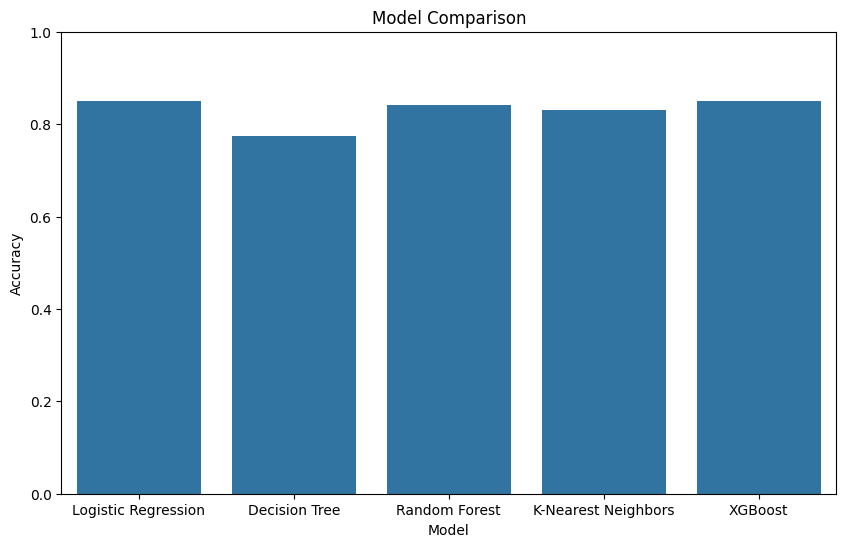

In [45]:
# Create a dictionary with model names and their corresponding accuracies
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

***Classification Reports***

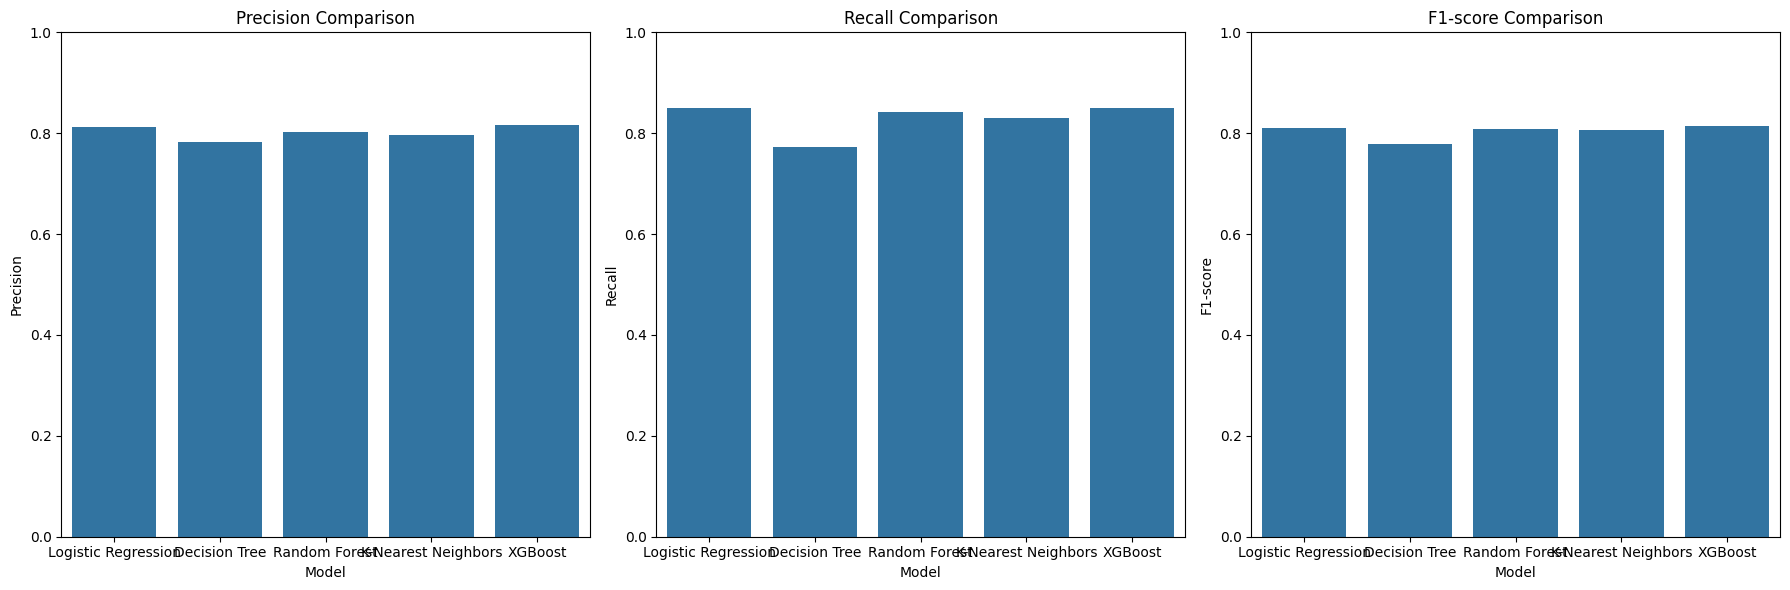

In [49]:
# Extract precision, recall, and f1-score for each model
precision = {model: classification_reports[model]['weighted avg']['precision'] for model in models}
recall = {model: classification_reports[model]['weighted avg']['recall'] for model in models}
f1_score = {model: classification_reports[model]['weighted avg']['f1-score'] for model in models}

# Convert the dictionaries to pandas DataFrames
precision_df = pd.DataFrame(list(precision.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall.items()), columns=['Model', 'Recall'])
f1_score_df = pd.DataFrame(list(f1_score.items()), columns=['Model', 'F1-score'])

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Model', y='Precision', data=precision_df, ax=axes[0])
axes[0].set_title('Precision Comparison')
axes[0].set_ylim(0, 1)

sns.barplot(x='Model', y='Recall', data=recall_df, ax=axes[1])
axes[1].set_title('Recall Comparison')
axes[1].set_ylim(0, 1)

sns.barplot(x='Model', y='F1-score', data=f1_score_df, ax=axes[2])
axes[2].set_title('F1-score Comparison')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

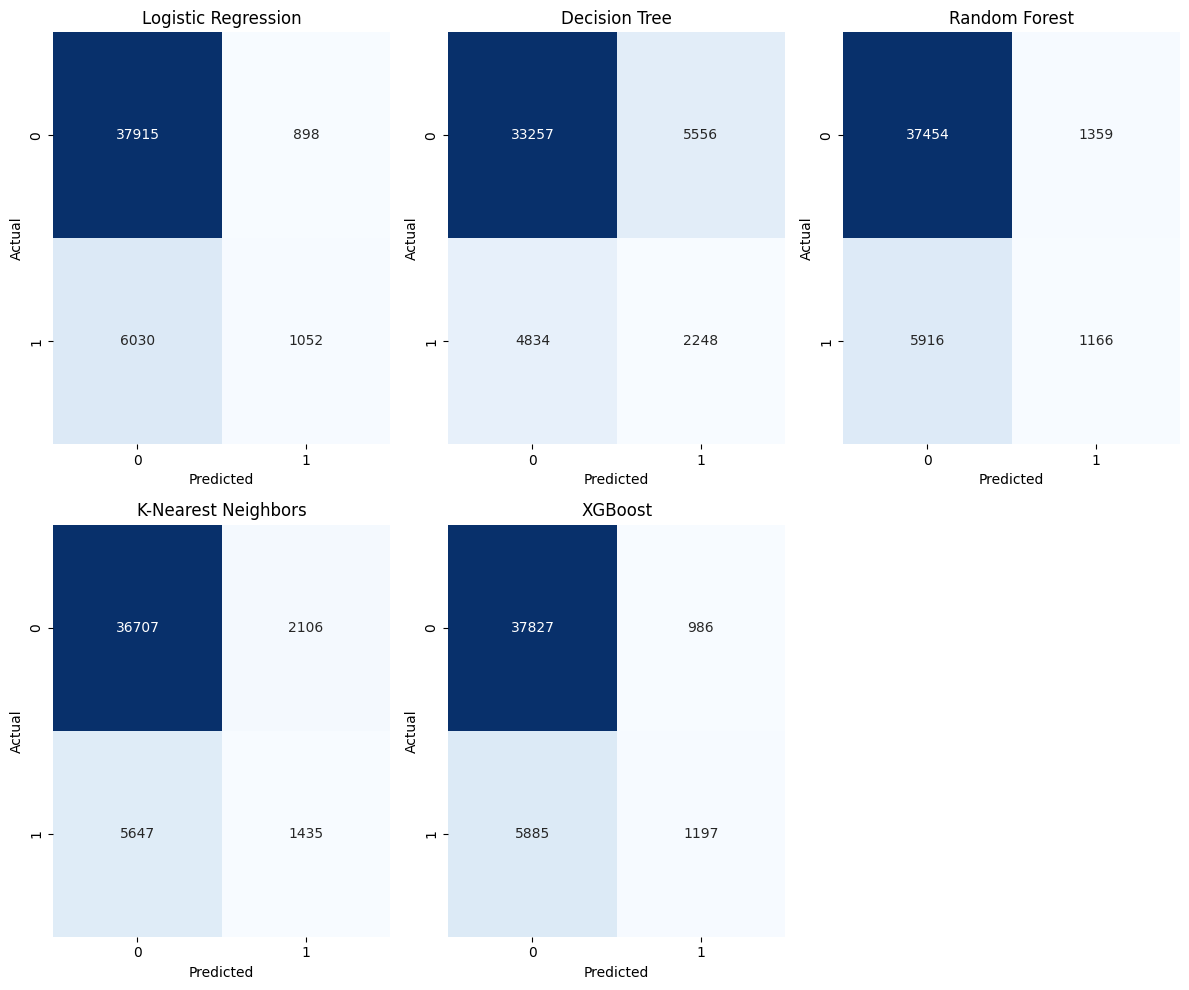

In [52]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Plot confusion matrices for each model
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')

plt.subplot(2, 3, 2)
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')

plt.subplot(2, 3, 3)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

plt.subplot(2, 3, 4)
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors')

plt.subplot(2, 3, 5)
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')

plt.tight_layout()
plt.show()

In [53]:
# Create arbitrary test data
arbitrary_test_data = pd.DataFrame({
    'HighBP': [1, 0],
    'HighChol': [1, 0],
    'CholCheck': [1, 1],
    'BMI': [30, 22],
    'Smoker': [0, 1],
    'Stroke': [0, 0],
    'HeartDiseaseorAttack': [0, 0],
    'PhysActivity': [1, 0],
    'Fruits': [1, 0],
    'Veggies': [1, 1],
    'HvyAlcoholConsump': [0, 0],
    'AnyHealthcare': [1, 1],
    'NoDocbcCost': [0, 0],
    'GenHlth': [3, 2],
    'MentHlth': [0, 0],
    'PhysHlth': [0, 0],
    'DiffWalk': [0, 0],
    'Sex': [0, 1],
    'Age': [9, 7],
    'Education': [4, 3],
    'Income': [5, 2]
})

# Standardize the arbitrary test data
arbitrary_test_data_scaled = scaler.transform(arbitrary_test_data)

# Predict using the XGBoost model
arbitrary_predictions = xgb_clf.predict(arbitrary_test_data_scaled)

# Print the predictions
print("Arbitrary Test Data Predictions:", arbitrary_predictions)

Arbitrary Test Data Predictions: [0 0]


In [54]:
# Create a DataFrame with the test data features and the predictions
test_data_with_predictions = arbitrary_test_data.copy()
test_data_with_predictions['Predicted_Diabetes'] = arbitrary_predictions

# Display the DataFrame
test_data_with_predictions

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Predicted_Diabetes
0,1,1,1,30,0,0,0,1,1,1,...,0,3,0,0,0,0,9,4,5,0
1,0,0,1,22,1,0,0,0,0,1,...,0,2,0,0,0,1,7,3,2,0


# Comprehensive Report on Diabetes Prediction Project

## Introduction
This project aims to predict the likelihood of diabetes in individuals based on various health indicators. The dataset used for this project is the CDC Diabetes Health Indicators dataset, which contains healthcare statistics and lifestyle survey data.

## Data Description
The dataset consists of 253,680 instances and 21 features, including:
- HighBP: High Blood Pressure
- HighChol: High Cholesterol
- CholCheck: Cholesterol Check
- BMI: Body Mass Index
- Smoker: Smoking Status
- Stroke: History of Stroke
- HeartDiseaseorAttack: History of Heart Disease or Attack
- PhysActivity: Physical Activity
- Fruits: Fruit Consumption
- Veggies: Vegetable Consumption
- HvyAlcoholConsump: Heavy Alcohol Consumption
- AnyHealthcare: Access to Healthcare
- NoDocbcCost: No Doctor because of Cost
- GenHlth: General Health
- MentHlth: Mental Health
- PhysHlth: Physical Health
- DiffWalk: Difficulty Walking
- Sex: Gender
- Age: Age
- Education: Education Level
- Income: Income Level

The target variable is `Diabetes_binary`, indicating whether the individual has diabetes (1) or not (0).

## Data Preprocessing
1. **Loading the Data**: The dataset was fetched using the `ucimlrepo` library.
2. **Data Inspection**: The first few rows and the structure of the dataset were inspected to understand the data.
3. **Missing Values**: Missing values were checked using the `missingno` library, and it was found that there were no missing values in the dataset.
4. **Duplicated Values**: Duplicated values were checked and removed from the dataset.
5. **Data Description**: The dataset was described to understand the distribution of the features.

## Exploratory Data Analysis
1. **Correlation Analysis**: The correlation between the features and the target variable was analyzed to identify the most significant predictors of diabetes.
2. **Visualization**: Various visualizations were created to understand the distribution and relationships between the features.

## Data Preparation
1. **Feature and Target Separation**: The features and target variable were separated.
2. **Train-Test Split**: The data was split into training and testing sets with an 80-20 split.
3. **Standardization**: The features were standardized using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1.

## Machine Learning Models
Several machine learning models were trained and evaluated on the dataset:
1. **Logistic Regression**: Achieved an accuracy of 84.90%.
2. **Decision Tree Classifier**: Achieved an accuracy of 77.36%.
3. **Random Forest Classifier**: Achieved an accuracy of 84.15%.
4. **K-Nearest Neighbors Classifier**: Achieved an accuracy of 83.11%.
5. **XGBoost Classifier**: Achieved an accuracy of 85.03%.

## Model Evaluation
1. **Accuracy**: The accuracy of each model was calculated and compared.
2. **Classification Report**: Precision, recall, and F1-score were extracted for each model.
3. **Confusion Matrix**: Confusion matrices were plotted for each model to visualize the performance.

## Model Comparison
The models were compared based on their accuracy, precision, recall, and F1-score. The XGBoost Classifier performed the best with an accuracy of 85.03%.

## Predictions on Arbitrary Test Data
Arbitrary test data was created and standardized. Predictions were made using the XGBoost model, and the results were displayed.

## Conclusion
The project successfully predicted the likelihood of diabetes using various machine learning models. The XGBoost Classifier was the best-performing model. The results can be used to identify individuals at risk of diabetes and take preventive measures.

## Future Work
1. **Feature Engineering**: Additional features can be created to improve model performance.
2. **Hyperparameter Tuning**: Hyperparameters of the models can be tuned to achieve better accuracy.
3. **Ensemble Methods**: Ensemble methods can be explored to combine the predictions of multiple models for improved performance.

## References
- CDC Diabetes Health Indicators Dataset: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)
- Scikit-learn Documentation: [Scikit-learn](https://scikit-learn.org/stable/)
- XGBoost Documentation: [XGBoost](https://xgboost.readthedocs.io/en/latest/)